- Uid: u1428543
- Date: May 17, 2023
- Class: CS6017
- HW 1

# Part 1: Python/Numpy Warmup

In [602]:
# Create an array of 100 random numbers using the Numpy rand function.

import numpy as np
import time


current_time = int(time.time())
np.random.seed(current_time)

random_array_100 = np.random.rand(100)
print(random_array_100)


[9.51399437e-01 5.91049081e-01 8.16891601e-01 2.49142079e-01
 2.74013084e-01 2.87828484e-01 2.30408734e-01 9.18828603e-01
 8.71776142e-01 9.17709691e-01 4.72726368e-01 4.36935092e-01
 6.59911723e-01 7.71502950e-01 5.72501462e-01 4.11381436e-01
 3.01042755e-01 8.11005497e-01 2.56919004e-01 7.64679971e-01
 9.34327762e-01 5.22632664e-01 7.67543313e-01 5.69063321e-01
 2.36787665e-01 8.72786657e-01 6.94150895e-01 8.85523178e-04
 9.62858823e-01 1.50478949e-01 8.57948458e-01 5.83470637e-01
 5.14672088e-01 9.01424083e-02 2.36702326e-01 2.15995905e-01
 5.94231347e-01 7.01525901e-01 1.60618704e-01 2.65433223e-01
 9.76100952e-01 1.55253106e-02 8.81248301e-01 4.34244343e-01
 3.86141604e-02 6.05020772e-01 5.17218776e-01 6.00531739e-01
 9.11898911e-01 7.43379459e-01 2.54609342e-01 7.80055492e-01
 9.65280022e-01 9.01683006e-01 7.81223852e-01 7.38480626e-01
 8.53232974e-01 1.41892409e-01 1.19512156e-01 1.11021089e-01
 2.86520355e-01 2.99498060e-02 4.63435027e-01 7.40117711e-02
 7.13907149e-01 5.431575

In [603]:


# compute the mean


def calculate_mean(data):
    return np.sum(data) / len(data)

random_array_100_mean = calculate_mean(random_array_100)
print("random_array_100_mean:", random_array_100_mean)



random_array_100_mean: 0.5130221882285274


In [604]:


# compute the standard deviation

def calculate_std_deviation(data):
    mean = calculate_mean(data)
    squared_diff = np.power(data - mean, 2)
    variance = np.sum(squared_diff) / (len(data) - 1)
    std_deviation = np.sqrt(variance)
    return std_deviation


random_array_100_std_deviation = calculate_std_deviation(random_array_100)

print("random_array_100_std_deviation:", random_array_100_std_deviation)


random_array_100_std_deviation: 0.31436110543304807


In [605]:
# Verify that your mean/std deviation functions work correctly. 

built_in_random_array_100_mean = np.mean(random_array_100)

assert built_in_random_array_100_mean == random_array_100_mean, "random_array_100_mean calculation is incorrect."

built_in_random_array_100_std_deviation = np.std(random_array_100, ddof=1)

assert built_in_random_array_100_std_deviation == random_array_100_std_deviation, "random_array_100_std_deviation calculation is incorrect."


In [606]:
# What happens (to the mean/std dev) when you increase the number of random numbers from 100 to 100000?

random_array_100000 = np.random.rand(100000)

random_array_100000_mean = calculate_mean(random_array_100000)

random_array_100000_std_deviation = calculate_std_deviation(random_array_100000)

print("random_array_100_mean:", random_array_100_mean)

print("random_array_100000_mean:", random_array_100000_mean)

if abs(random_array_100000_mean - 0.5) < abs(random_array_100_mean - 0.5):
    print("The mean of random_array_100000 is closer to 0.5 than the mean of random_array_100, as expected.")
else:
    print("The mean of random_array_100 is closer to 0.5 than the mean of random_array_100000.")

print("random_array_100_std_deviation:", random_array_100_std_deviation)

print("random_array_100000_std_deviation:", random_array_100000_std_deviation)

if random_array_100000_std_deviation < random_array_100_std_deviation:
    print("The standard deviation of random_array_100000 is lower than the standard deviation of random_array_100.")
else:
    print("The standard deviation of random_array_100 is lower than the standard deviation of random_array_100000.")


random_array_100_mean: 0.5130221882285274
random_array_100000_mean: 0.4993938836880142
The mean of random_array_100000 is closer to 0.5 than the mean of random_array_100, as expected.
random_array_100_std_deviation: 0.31436110543304807
random_array_100000_std_deviation: 0.28849352386003824
The standard deviation of random_array_100000 is lower than the standard deviation of random_array_100.


In [607]:
# Now use scipy.stats.norm to sample from the normal (gaussian) distribution to create an array of data (10000 values). 

from scipy.stats import norm

norm_data_array_10000 = norm.rvs(size=10000)

print(norm_data_array_10000)



[ 0.41494185  0.58378234 -0.37510817 ...  0.42545984 -0.19445655
  0.92149866]


In [608]:


# Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods.

norm_data_array_10000_mean = calculate_mean(norm_data_array_10000)

norm_data_array_10000_std_deviation = calculate_std_deviation(norm_data_array_10000)

built_in_norm_data_array_10000_mean = np.mean(norm_data_array_10000)

built_in_norm_data_array_10000_std_deviation = np.std(norm_data_array_10000, ddof=1)

assert built_in_norm_data_array_10000_mean == norm_data_array_10000_mean, "norm_data_array_10000_mean calculation is incorrect."

assert built_in_norm_data_array_10000_std_deviation == norm_data_array_10000_std_deviation, "norm_data_array_10000_std_deviation calculation is incorrect."

print("norm_data_array_10000_mean:", norm_data_array_10000_mean)

print("norm_data_array_10000_std_deviation:", norm_data_array_10000_std_deviation)


norm_data_array_10000_mean: -0.004123887117539382
norm_data_array_10000_std_deviation: 0.9974486382520538


 **What does the results of the mean/std dev of this data tell you about Scipy's norm's rvs function?**

> The default behavior of Scipy's norm's rvs function is to generate data with a mean of 0 and a standard deviation of 1.

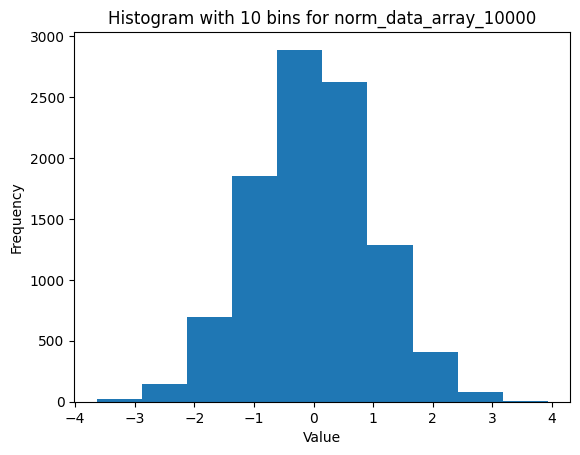

In [609]:
# Plot a histogram of your samples (using the pyplot hist function). Experiment with using 10, 20, 40 bins.

import matplotlib.pyplot as plt


def plot_histogram(data, num_bins):
    plt.hist(data, bins=num_bins)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram with {num_bins} bins for norm_data_array_10000')
    plt.show()


# Plot histogram with 10 bins
plot_histogram(norm_data_array_10000, num_bins=10)


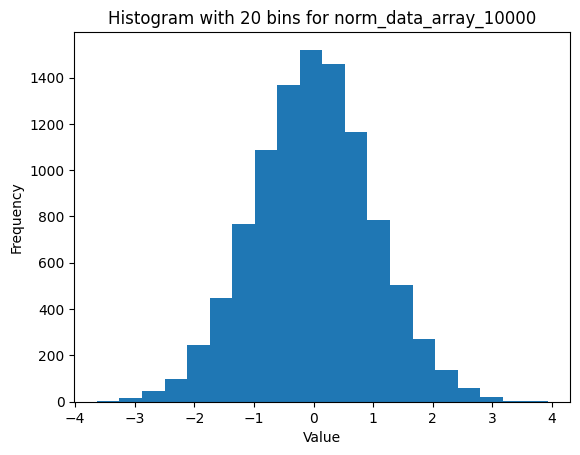

In [610]:
# Plot histogram with 20 bins
plot_histogram(norm_data_array_10000, num_bins=20)


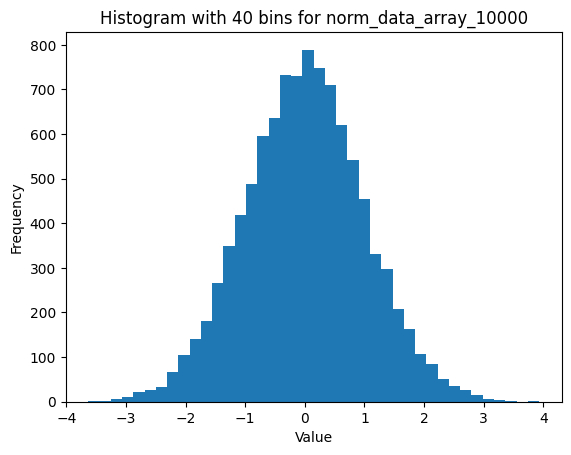

In [611]:
# Plot histogram with 40 bins
plot_histogram(norm_data_array_10000, num_bins=40)


# Part 2: Data Exploration/Analysis

## Plot the readings over the course of a year

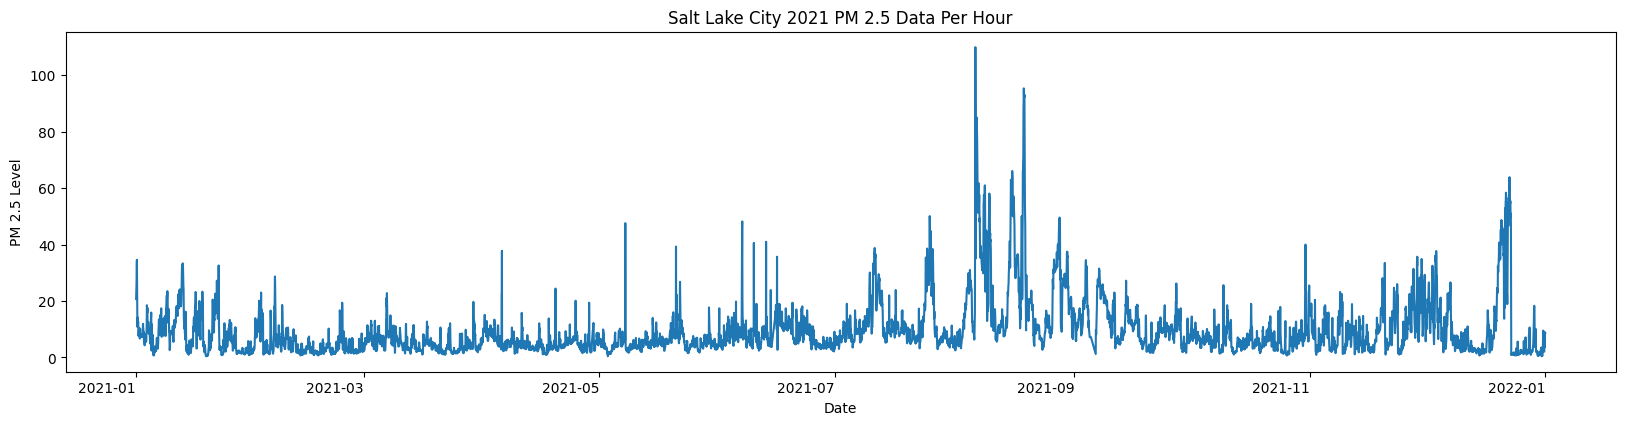

In [612]:

import pandas as pd

df = pd.read_csv('SLC_PM2_5_SLC.csv')

# Drop rows with missing values in the 'HW-MC' column aka SLC station
df = df.dropna(subset=['HW-MC'])

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

df.set_index('Date', inplace=True)

plt.figure(figsize=(20, 5))  

df['HW-MC'].plot()

plt.xlabel('Date')
plt.ylabel('PM 2.5 Level')

plt.xticks(rotation=0)

plt.title('Salt Lake City 2021 PM 2.5 Data Per Hour')

plt.show()


## Plot the mean PM2.5 level for each month


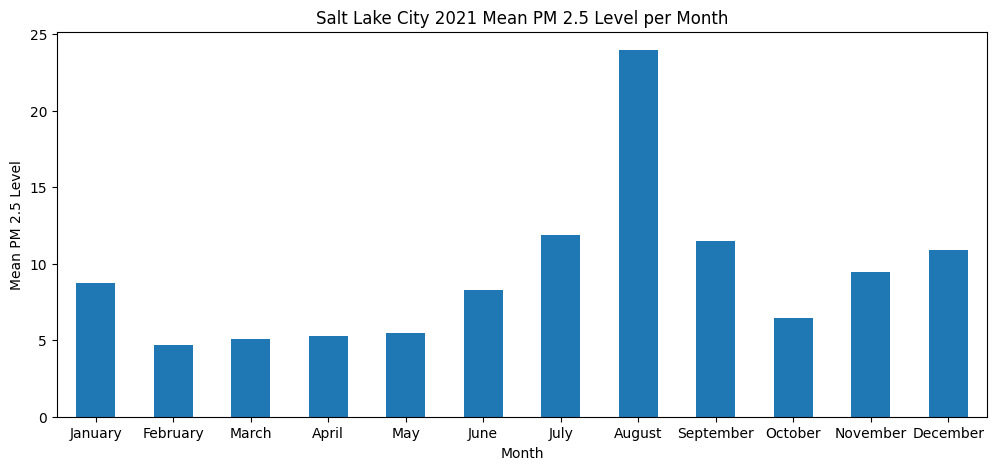

In [613]:
monthly_mean = df['HW-MC'].resample('M').mean()

# Convert the index to month names
monthly_mean.index = monthly_mean.index.strftime('%B')

plt.figure(figsize=(12, 5))
monthly_mean.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Mean PM 2.5 Level')
plt.title('Salt Lake City 2021 Mean PM 2.5 Level per Month')

# Rotate x-axis labels
plt.xticks(rotation=0)

plt.show()


1. The PM 2.5 levels reach their peak in August, with a mean value of 23.95. This indicates the highest pollution levels observed throughout the year.
2. There is a slight increase in PM 2.5 levels from October to December. The mean values range from 6.47 in October to 10.87 in December, suggesting a gradual rise in pollution during this period.

The air quality exhibits a seasonal pattern, with the worst pollution levels occurring in the summer months, specifically in July and August. These months show mean PM 2.5 values of 11.85 and 23.95, respectively. However, there is also a smaller peak in PM 2.5 levels during the winter months, particularly in December. The mean PM 2.5 value for December is 10.87, indicating a slight increase in pollution compared to the preceding months. This suggests that air quality tends to deteriorate during both the summer and winter seasons, while experiencing relatively better conditions in the transitional months between these two seasons.The air quality exhibits a seasonal pattern, with the worst pollution levels occurring in the summer months, specifically in July and August. These months show mean PM 2.5 values of 11.85 and 23.95, respectively. However, there is also a smaller peak in PM 2.5 levels during the winter months, particularly in December. The mean PM 2.5 value for December is 10.87, indicating a slight increase in pollution compared to the preceding months. This suggests that air quality tends to deteriorate during both the summer and winter seasons, while experiencing relatively better conditions in the transitional months between these two seasons.

# Plot the mean pollution level for each hour

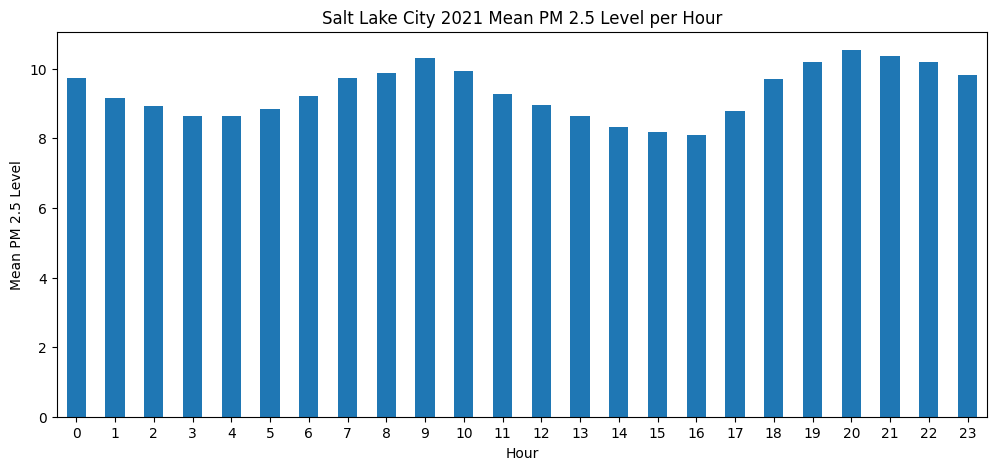

In [614]:
hourly_mean = df.groupby(df.index.hour)['HW-MC'].mean()

plt.figure(figsize=(12, 5))
hourly_mean.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Mean PM 2.5 Level')
plt.title('Salt Lake City 2021 Mean PM 2.5 Level per Hour')

# Rotate x-axis labels
plt.xticks(rotation=0)

plt.show()


1. The hourly mean PM 2.5 data reveals two distinct peaks, occurring around hour 9 and hour 20.
2. Overall, the hourly mean PM 2.5 levels demonstrate a narrow range of variation throughout the day. The values range from 8.091 to 10.538, indicating relatively consistent pollution levels within the 24-hour period.

## Box plot by month



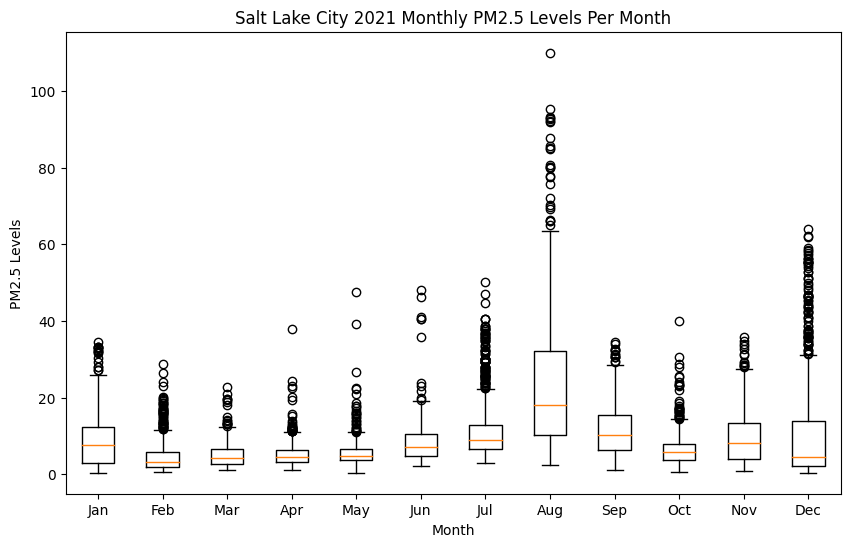

In [615]:
monthly_grouped = df.groupby(df.index.month)

boxplot_data = []

for month, group_data in monthly_grouped:
    boxplot_data.append(group_data['HW-MC'].values)

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[
            'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('PM2.5 Levels')
plt.title('Salt Lake City 2021 Monthly PM2.5 Levels Per Month')
plt.show()


1. The presence of a long whisker and numerous outliers in August suggests that extreme values significantly impact the mean, leading to a higher average PM 2.5 level for that month. This highlights the importance of considering outliers and extreme values when interpreting the mean.
2. November exhibits a lower mean compared to December, despite having a higher median. This indicates the influence of outliers in December, pulling the mean higher. These observations demonstrate that the mean can be less dependable in the presence of skewed distributions or outliers.

## Box plot by hour

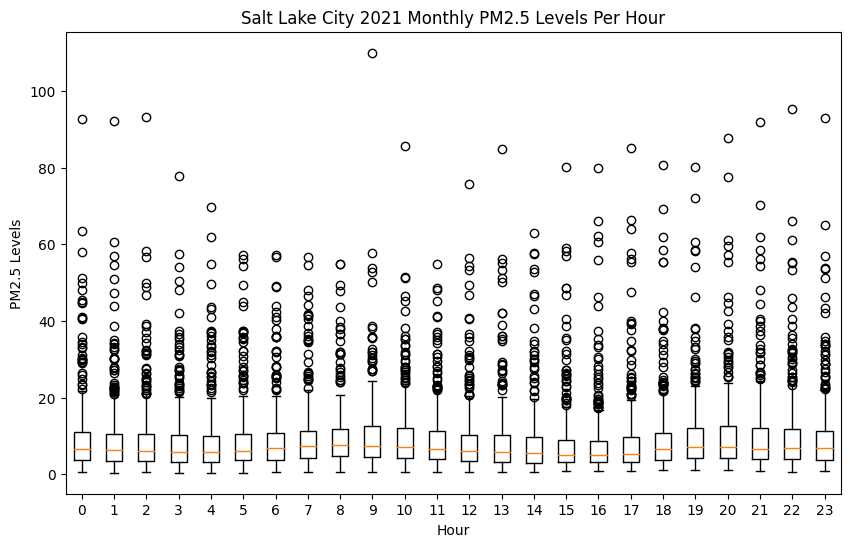

In [616]:
hour_grouped = df.groupby(df.index.hour)

boxplot_data = []

for hour, group_data in hour_grouped:
    boxplot_data.append(group_data['HW-MC'].values)

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=range(24))
plt.xlabel('Hour')
plt.ylabel('PM2.5 Levels')
plt.title('Salt Lake City 2021 Monthly PM2.5 Levels Per Hour')
plt.show()


1. Smooth Median and Percentiles: The smooth change in the median and percentiles throughout the day indicates a consistent pattern or trend in the PM 2.5 levels over the course of 24 hours. This smoothness suggests that there is generally a predictable variation in air quality throughout the day, with relatively consistent median and percentile values. This reflects the general trend and consistency in PM 2.5 levels throughout the day.
2. Outliers Concentrated in a Range: Every hour exhibits a significant number of outliers, indicating the presence of extreme PM 2.5 values. These outliers tend to concentrate in a range from 20 to 60, suggesting a common range of higher pollution levels during most hours. 
3. Higher Outliers in a Few Hours: While most outliers fall within the 20 to 60 range, there are a few hours that have outliers even higher than this range. 